In [1]:
import pandas as pd
import os
import sys
#connect local PATH
p = os.path.abspath(r'C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\utils')
sys.path.insert(1, p)

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [152]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
from cryptosent_utils import get_submissions_raw,date_parser_utc

In [50]:
s=get_submissions_raw()

In [51]:
#col drop
s=s.drop(columns=['Unnamed: 0','domain.1'])

#cols order
cols_order_subs=['created_utc','author',
                 'num_comments','score','title','selftext',
                 'subreddit','subreddit_subscribers','id',  
                 'domain','no_follow',
                 'send_replies',  'author_created_utc', 'author_fullname', 
                 'subreddit_id',
                 'permalink','url']

s=s[cols_order_subs]

# parsing utc dates
s['created']=s.created_utc.apply(date_parser_utc)
s['created']=pd.to_datetime(s.created)
s.index=s.created
s['author_created']=s.author_created_utc.fillna(1461114906).apply(date_parser_utc)
s['author_created']=pd.to_datetime(s.author_created)
s.loc[s['author_created']==date_parser_utc(1461114906),'author_created']=None

#drop utc dates
s=s.drop(columns=['created_utc','author_created_utc'])

#define categories for lower ram usage
#s.subreddit=s.subreddit.astype('category')
s.domain=s.domain.astype('category')
s.no_follow=s.no_follow.astype('category')
s.send_replies=s.send_replies.astype('category')
s.subreddit_id=s.subreddit_id.astype('category')

In [52]:
print(s.apply(lambda col: col.nunique()))

author                    331569
num_comments                1664
score                       3453
title                    1270060
selftext                  250826
subreddit                   2307
subreddit_subscribers     154753
id                       1686925
domain                     33359
no_follow                      2
send_replies                   2
author_fullname           331568
subreddit_id                2307
permalink                1686925
url                      1467922
created                  1629040
author_created            313273
dtype: int64


In [53]:
s.memory_usage()

Index                    13495400
author                   13495400
num_comments             13495400
score                    13495400
title                    13495400
selftext                 13495400
subreddit                13495400
subreddit_subscribers    13495400
id                       13495400
domain                    8071380
no_follow                 1687049
send_replies              1687049
author_fullname          13495400
subreddit_id              3458394
permalink                13495400
url                      13495400
created                  13495400
author_created           13495400
dtype: int64

In [54]:
s.head(10).T

created,2019-01-01 01:00:29,2019-01-01 01:02:26,2019-01-01 01:02:52,2019-01-01 01:03:57,2019-01-01 01:05:35,2019-01-01 01:07:47,2019-01-01 01:08:01,2019-01-01 01:08:11,2019-01-01 01:08:21,2019-01-01 01:08:38
author,[deleted],wwtt1210,GregGriffith,Alderias,bearCatBird,h2022395,GossipPress,asazot,SMVR2,NedStarkWinter11
num_comments,0,1,0,0,11,0,0,14,12,0
score,1,80,0,1,0,1,1,189,6,1
title,DENT Exchange live. Time to recognize DENT!,[@litecoin] Happy New Year! 🎆 Let’s make 2019 ...,I have a mission if you choose to accept it...,Buy XRP and Win a Lamborghini,Are these accurate criticisms of Lightning Net...,Dec 31 2018 Important Crypto News,CRYPTO WILL SAVE THE WORLD,May The Bulls Be With You In This 2019!,How to open a Bitcoin wallet without a bank ac...,Buy litecoin on robin hood for no transaction fee
selftext,[removed],NaN,I heard somewhere that a majority of CSWs twee...,[removed],I'm excited about LN. I'm in progress setting ...,NaN,NaN,NaN,"Hi, please don’t make fun of me, I’m new to Cr...",[removed]
subreddit,CryptoCurrency,litecoin,btc,Ripple,Bitcoin,CryptoCurrency,CryptoCurrency,Bitcoin,Bitcoin,litecoin
subreddit_subscribers,854254,199926,245638,197778,1022253,854254,854254,1022253,1022253,199926
id,abcuni,abcvc9,abcvgy,abcvu8,abcwdu,abcx38,abcx67,abcx89,abcxb0,abcxeu
domain,self.CryptoCurrency,mobile.twitter.com,self.btc,self.Ripple,self.Bitcoin,medium.com,gossippress.com,i.redd.it,self.Bitcoin,self.litecoin
no_follow,True,False,True,True,True,True,True,False,False,True


In [55]:
comparison=pd.read_excel(r"C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\bit_crypto_posts_per_day.xlsx")

In [56]:
comparison.index=pd.to_datetime(comparison.date)
comparison=comparison.fillna(0)

In [57]:
df=pd.concat([comparison['2019-01-01':'2021-07-01'],
                       s[s.subreddit=='CryptoCurrency'].resample('d').score.count(),
                       s[s.subreddit=='Bitcoin'].resample('d').subreddit.count()],
                       axis=1).rename(columns={'score':'cryptocurrency_scrape',
                                               'subreddit':'bitcoin_scrape',
                                               'bitcoin':'bitcoin_stats',
                                               'cryptocurrency':'cryptocurrency_stats'})\
.drop(columns=['date']).fillna(0).resample('d').sum().iloc[:-1]\
[['bitcoin_stats','bitcoin_scrape','cryptocurrency_stats','cryptocurrency_scrape']]

<AxesSubplot:>

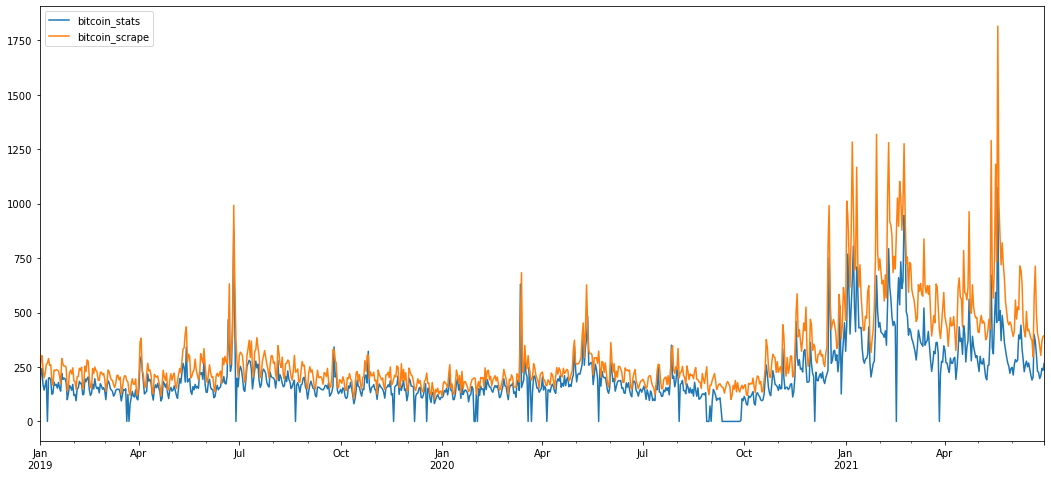

In [58]:
df.resample('d').sum()[['bitcoin_stats','bitcoin_scrape']].plot(figsize=(18,8))

<AxesSubplot:>

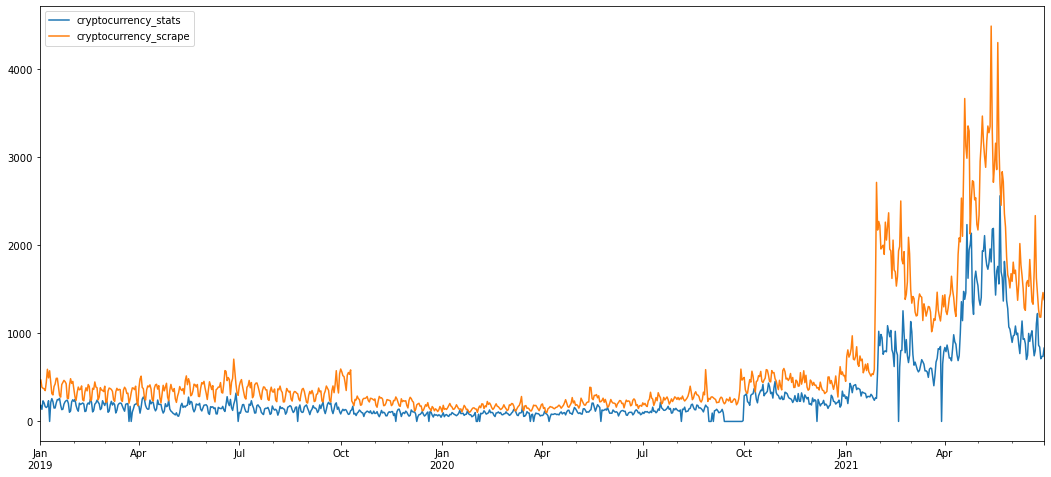

In [59]:
df.resample('d').sum()[['cryptocurrency_stats','cryptocurrency_scrape']].plot(figsize=(18,8))

<AxesSubplot:xlabel='created'>

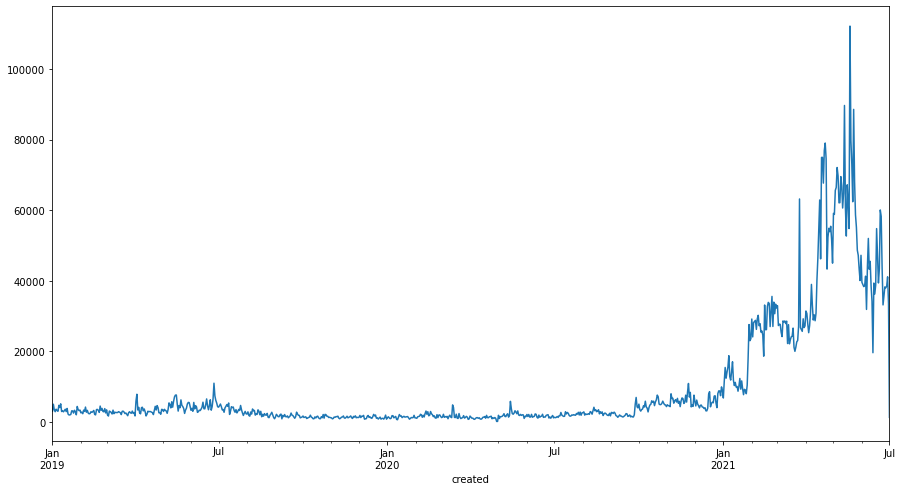

In [60]:
s[s.subreddit=='CryptoCurrency'].resample('d').num_comments.sum().plot(figsize=(15,8))

<AxesSubplot:xlabel='created'>

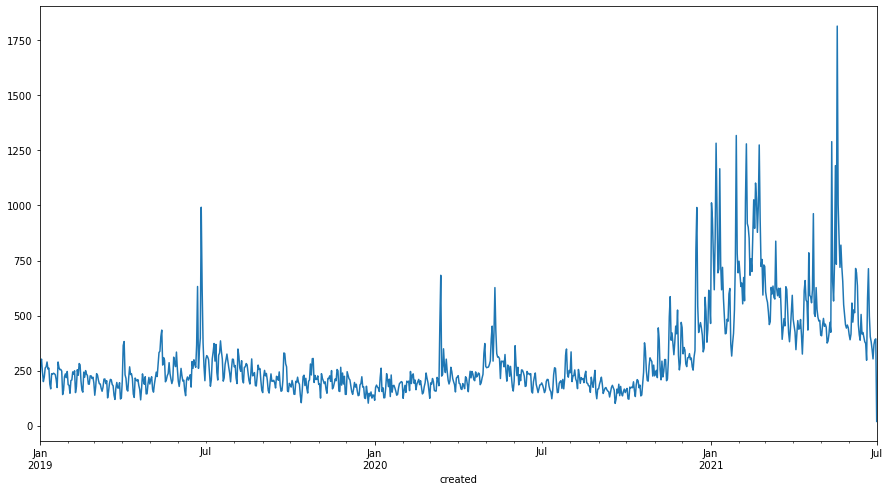

In [61]:
s[s.subreddit=='Bitcoin'].resample('d').score.count().plot(figsize=(15,8))

<AxesSubplot:xlabel='created'>

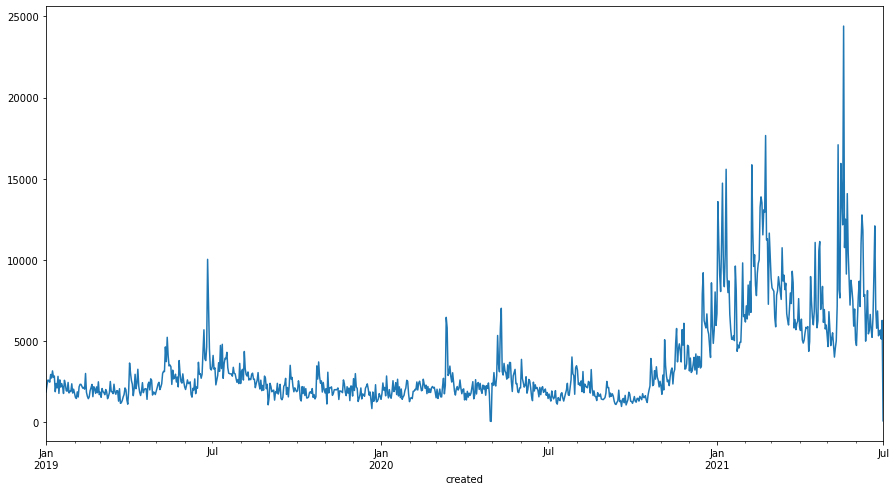

In [62]:
s[s.subreddit=='Bitcoin'].resample('d').num_comments.sum().plot(figsize=(15,8))

## WordCoulds


In [92]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [99]:
wordcloud = WordCloud().generate(str(s.title.to_list()))

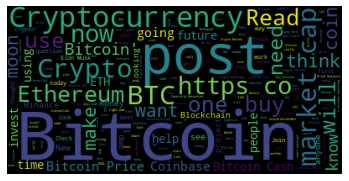

In [107]:
#plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [63]:
s.head().T

created,2019-01-01 01:00:29,2019-01-01 01:02:26,2019-01-01 01:02:52,2019-01-01 01:03:57,2019-01-01 01:05:35
author,[deleted],wwtt1210,GregGriffith,Alderias,bearCatBird
num_comments,0,1,0,0,11
score,1,80,0,1,0
title,DENT Exchange live. Time to recognize DENT!,[@litecoin] Happy New Year! 🎆 Let’s make 2019 ...,I have a mission if you choose to accept it...,Buy XRP and Win a Lamborghini,Are these accurate criticisms of Lightning Net...
selftext,[removed],NaN,I heard somewhere that a majority of CSWs twee...,[removed],I'm excited about LN. I'm in progress setting ...
subreddit,CryptoCurrency,litecoin,btc,Ripple,Bitcoin
subreddit_subscribers,854254,199926,245638,197778,1022253
id,abcuni,abcvc9,abcvgy,abcvu8,abcwdu
domain,self.CryptoCurrency,mobile.twitter.com,self.btc,self.Ripple,self.Bitcoin
no_follow,True,False,True,True,True


In [64]:
s.nunique()

author                    331569
num_comments                1664
score                       3453
title                    1270060
selftext                  250826
subreddit                   2307
subreddit_subscribers     154753
id                       1686925
domain                     33359
no_follow                      2
send_replies                   2
author_fullname           331568
subreddit_id                2307
permalink                1686925
url                      1467922
created                  1629040
author_created            313273
dtype: int64

In [65]:
top_subsreddits=['Bitcoin','CryptoCurrency','btc','CryptoMarkets','bitcoinbeginners',
                   'CryptoCurrencies','altcoin','icocrypto','CryptoCurrencyTrading','Crypto_General',
                   'ico','blockchain','ethereum','Ripple','litecoin','Monero','Stellar']

In [66]:
s[s.subreddit.isin(top_subsreddits)].subreddit.value_counts()


CryptoCurrency           536461
Bitcoin                  280324
CryptoCurrencies         115399
CryptoCurrencyTrading    113457
CryptoMarkets             98406
btc                       94075
ethereum                  74155
ico                       57369
Crypto_General            50813
altcoin                   28200
Monero                    25248
Ripple                    18850
Stellar                   14996
litecoin                  14888
icocrypto                  3678
Name: subreddit, dtype: int64

In [167]:
def date_decomposition(s):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    s['year']=s.created.dt.year.values
    s['month']=s.created.dt.month.values
    s['month_name']=s.created.dt.month_name().str.slice(stop=3)
    s['month_name'] = pd.Categorical(s['month_name'], categories=months, ordered=True)
    s['day']=s.created.dt.day.values
    s['day_name']=s.created.dt.day_name().values
    s['day_name'] = pd.Categorical(s['day_name'], categories=days, ordered=True)
    s['week']=s.created.dt.isocalendar().week.values
    s['day_of_week']=s.created.dt.dayofweek.values
    s['hour']=s.created.dt.hour.values
    s['minute']=s.created.dt.minute.values
    
date_decomposition(s)

In [447]:
s.shape[0]

1686925

## Basic Trends

In [170]:
import plotly.express as px

a= s[s.subreddit.isin(top_subsreddits)].subreddit.value_counts().head(200)

fig = px.bar(a,
             color=a.index,
             width=1200, 
             height=700,
             title='Subreddit Popularity')
fig.update_layout(yaxis_title="Submission Volume",
                  xaxis_title="Subreddit")
fig.show()

In [ ]:
top7=['CryptoCurrency','Bitcoin','CryptoCurrencies','CryptoCurrencyTrading','CryptoMarkets','btc','ethereum']

In [360]:
s=s.rename(columns={'created': 'Date'})

In [439]:
a=s[s.subreddit.isin(top7)].pivot_table(index='Date',columns='subreddit',
                                        values=['score','num_comments','Volume']
                                        ,aggfunc='sum').resample('w').sum().head(-1)

In [441]:


metric='Volume'
fig = px.line(a[metric].reset_index().head(-1), x='Date', y=a[metric].columns,title='Posts per Subreddit')
fig.update_layout(yaxis_title="Posts",
                  xaxis_title="Date")
# Show plot 
fig.show()

metric='num_comments'
fig = px.line(a[metric].reset_index().head(-1), x='Date', y=a[metric].columns,title='Comments per Subreddit')
fig.update_layout(yaxis_title="Posts",
                  xaxis_title="Date")
# Show plot 
fig.show()

metric='score'
fig = px.line(a[metric].reset_index().head(-1), x='Date', y=a[metric].columns,title='Score per Subreddit')
fig.update_layout(yaxis_title="Posts",
                  xaxis_title="Date")
# Show plot 
fig.show()

In [442]:
metric='Volume'
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=a[metric].reset_index()['Date'], y=a[metric]['Bitcoin'],name='u_Bitcoin'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=a[metric].reset_index()['Date'], y=a[metric]['CryptoCurrency'],name='u_CryptoCurrency'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=btc_price_avg.index, y=btc_price_avg, name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Volume of Posts"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Posts</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [443]:
metric='num_comments'
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=a[metric].reset_index()['Date'], y=a[metric]['Bitcoin'],name='u_Bitcoin'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=a[metric].reset_index()['Date'], y=a[metric]['CryptoCurrency'],name='u_CryptoCurrency'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=btc_price_avg.index, y=btc_price_avg, name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Volume of Posts"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Posts</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [444]:
metric='score'
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=a[metric].reset_index()['Date'], y=a[metric]['Bitcoin'],name='u_Bitcoin'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=a[metric].reset_index()['Date'], y=a[metric]['CryptoCurrency'],name='u_CryptoCurrency'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=btc_price_avg.index, y=btc_price_avg, name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Volume of Posts"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Posts</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [445]:
def trend_plots(s):
    width_in=1000
    m_ind = ['Jan', 'Feb','Mar','Apr', 'May','Jun', 'Jul','Aug','Sep', 'Oct','Noe', 'Dec']
    ind   = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    s['Volume']=1


    a = s.resample('m').Volume.count().head(-1)
    fig = px.line(a,x=a.index,y='Volume',width=width_in, height=500,title='Yearly Trend')
    fig.update_layout(xaxis_title="",yaxis_title="Posts")
    fig.show()


    a = s.groupby('month_name').agg('count')['Volume']
    fig = px.line(a,x=a.index,y='Volume',width=width_in, height=500,title='Monthly Patterns')
    fig.update_layout(xaxis_title="",yaxis_title="Posts")
    fig.show()


    a = s.groupby('day_name').agg('count')['Volume']#.reindex(ind)
    fig = px.bar(a,x=a.index,y='Volume',width=width_in, height=500,title='Weekly Patterns',color=a.index)
    fig.update_layout(xaxis_title="",yaxis_title="Posts")
    fig.show()


    a = s.groupby(['day_name','hour']).count()['Volume']
    a=a.reset_index()
    a.hour=a.hour.astype(str).str.replace('0','24')
    #a['i'] = a['hour'].astype(str)+ ' ' + a['day_name'].astype(str).str.slice(stop=3)
    a['i'] = a['day_name'].astype(str).str.slice(stop=3)+ ' ' + a['hour'].astype(str)
    fig = px.line(a,x='i',y='Volume',width=width_in, height=500,title='The 24-7 cycle')
    fig.update_layout(xaxis_title="",yaxis_title="Posts")
    fig.show()


    a = s.groupby('hour').agg('count')['Volume']
    fig = px.line(a,x=a.index,y='Volume',width=width_in, height=500,title='The 24-hour cycle')
    fig.update_layout(xaxis_title="Hour",yaxis_title="Posts")
    fig.show()

In [446]:
trend_plots(s)

## 🚀 

In [257]:
btc_price=pd.read_csv(r"C:\Users\Ben\Desktop\Diplomatiki\CryptoSent\Datasets\other\coin_Bitcoin.csv")
btc_price.Date=pd.to_datetime(btc_price.Date)
btc_price=btc_price.set_index('Date')
btc_price['avg_price']=(btc_price.High+btc_price.Low)/2

In [464]:
dchunk='w'
missile=s[((s.title.str.contains('🚀').fillna(False))&
           (s.title.str.contains('|'.join(['Bitcoin','btc']),case=False)))].resample(dchunk).count().head(-1).Volume
btc_price_avg=btc_price.resample(dchunk).mean().loc['2019':'2021-06']['avg_price']

In [465]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=missile.index, y=missile, name="🚀"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=btc_price_avg.index, y=btc_price_avg, name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="BTC vs 🚀 - Weekly"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Volume of 🚀 </b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [288]:
dchunk='w'
missile=s[(s.title.str.contains('🚀').fillna(False))&
          (s.title.str.contains('|'.join(['Bitcoin','btc']),case=False)|
          (s.subreddit.isin(['Bitcoin','btc'])))].resample(dchunk).count().head(-1).Volume
btc_price_avg=btc_price.resample(dchunk).mean().loc['2019':'2021-06']['avg_price']

In [289]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=missile.index, y=missile, name="🚀"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=btc_price_avg.diff().tail(-1).index, y=btc_price_avg.diff().tail(-1), name="Bit Coin Avg"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="BTC Diff vs 🚀 - Weekly"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Volume of 🚀 </b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

In [455]:
btc_price_avg.diff().tail(-1).values

array([ 1.03622851e+02, -1.74138353e+00, -5.60599021e+01,  4.60075123e+01,
        8.90036425e+01,  9.68484405e+01, -3.76553321e+00, -7.45496558e+00,
       -1.83912650e+02, -1.78144719e+02, -7.08122291e+00, -6.65509954e+01,
        3.02171139e+01,  2.99905496e+01, -1.48260470e+01, -4.17672219e+00,
        8.75193188e+00,  4.56552456e+01, -4.22519507e+01, -7.95147300e+01,
       -3.45506127e+00,  1.39569554e+01, -1.60076211e+00,  1.67236715e+00,
        2.98770174e+01, -3.41809224e+01, -7.69666489e+01, -7.45493986e+01,
        2.38388727e+01,  1.40789326e+01, -9.58753733e+00,  2.86581941e+01,
       -1.07747401e+01, -2.52509181e+01,  5.63718512e+00, -3.12139927e+01,
       -2.27464329e+01,  1.32236755e+02,  1.19931559e+02,  4.75756118e+00,
        9.42402250e-01, -2.53785065e+01, -7.54098950e-02, -1.65192710e+01,
        1.02354988e+00,  6.05501875e+00,  1.58039421e+01,  1.53463953e+02,
        1.56192532e+02,  3.85041500e+00,  1.16922254e+01,  3.61857201e+00,
        8.88290228e+01, -

In [456]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=btc_price_avg.diff().tail(-1).values, y=missile.diff().tail(-1).values, name="🚀"),
    secondary_y=False,
)



# Add figure title
fig.update_layout(
    title_text="BTC Diff vs 🚀 - Weekly"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Volume of 🚀 </b>", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC Price</b>", secondary_y=True)

fig.show()

## things to do 
* Granger Causality
* % change
* correlation
* filter on experts
* calculate Metrics KPIs

In [457]:
import matplotlib.pylab as plt


In [461]:
btc_price_avg.diff().tail(-1)

Date
2019-01-02     103.622851
2019-01-03      -1.741384
2019-01-04     -56.059902
2019-01-05      46.007512
2019-01-06      89.003642
                 ...     
2021-06-26   -2008.021437
2021-06-27    1952.897758
2021-06-28    1197.041590
2021-06-29     836.314113
2021-06-30    -316.842137
Freq: D, Name: avg_price, Length: 911, dtype: float64

In [463]:
missile.diff().tail(-1)

created
2019-01-29   -2.0
2019-01-30    1.0
2019-01-31    0.0
2019-02-01   -1.0
2019-02-02    0.0
             ... 
2021-06-26   -1.0
2021-06-27    5.0
2021-06-28   -4.0
2021-06-29    2.0
2021-06-30    0.0
Freq: D, Name: Volume, Length: 884, dtype: float64

ValueError: x and y must be the same size

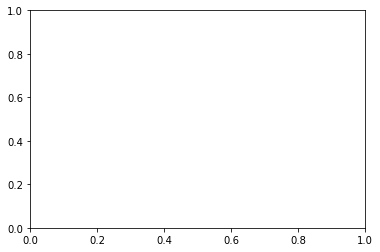

In [459]:
plt.scatter(btc_price_avg.diff().tail(-1).values, missile.diff().tail(-1).values)
